# 

In [1]:
import pandas as pd
import numpy as np
#thư viện matplotlib, seaborn để vẽ biểu đồ trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns
#thư viện sklearn để biến đổi và chuẩn hóa dữ liệu
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#thư viện chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
#Thư viện khia báo mô hình Logistic Regresstion
from sklearn.linear_model import LogisticRegression
#Các chỉ số đánh giá accuracy, precision, recall, f1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# giải quyết mất cân bàng dữ liệu 
from imblearn.over_sampling import SMOTE

In [2]:
#Nhập dữ liệu vào df
df = pd.read_csv('telco_churn.csv')
df

,STT,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,FALSE,TRUE,FALSE,1,FALSE,NaN,DSL,...,FALSE,FALSE,FALSE,FALSE,Month-to-month,TRUE,Electronic check,29.850000,29.85000038,FALSE
1,1,5575-GNVDE,Male,FALSE,FALSE,FALSE,34,TRUE,FALSE,DSL,...,TRUE,FALSE,FALSE,FALSE,One year,FALSE,Mailed check,56.950001,1889.5,FALSE
2,2,3668-QPYBK,Male,FALSE,FALSE,FALSE,2,TRUE,FALSE,DSL,...,FALSE,FALSE,FALSE,FALSE,Month-to-month,TRUE,Mailed check,53.849998,108.1500015,TRUE
3,3,7795-CFOCW,Male,FALSE,FALSE,FALSE,45,FALSE,NaN,DSL,...,TRUE,TRUE,FALSE,FALSE,One year,FALSE,Bank transfer (automatic),42.299999,1840.75,FALSE
4,4,9237-HQITU,Female,FALSE,FALSE,FALSE,2,TRUE,FALSE,Fiber optic,...,FALSE,FALSE,FALSE,FALSE,Month-to-month,TRUE,Electronic check,70.699997,151.6499939,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


#CÁc BƯỚC TIỀN XỬ LÍ DỮ LIỆU 


In [3]:
#xem xét 5 dòng đầu của dữ liệu
df.head()

,STT,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,FALSE,TRUE,FALSE,1,FALSE,NaN,DSL,...,FALSE,FALSE,FALSE,FALSE,Month-to-month,TRUE,Electronic check,29.850000,29.85000038,FALSE
1,1,5575-GNVDE,Male,FALSE,FALSE,FALSE,34,TRUE,FALSE,DSL,...,TRUE,FALSE,FALSE,FALSE,One year,FALSE,Mailed check,56.950001,1889.5,FALSE
2,2,3668-QPYBK,Male,FALSE,FALSE,FALSE,2,TRUE,FALSE,DSL,...,FALSE,FALSE,FALSE,FALSE,Month-to-month,TRUE,Mailed check,53.849998,108.1500015,TRUE
3,3,7795-CFOCW,Male,FALSE,FALSE,FALSE,45,FALSE,NaN,DSL,...,TRUE,TRUE,FALSE,FALSE,One year,FALSE,Bank transfer (automatic),42.299999,1840.75,FALSE
4,4,9237-HQITU,Female,FALSE,FALSE,FALSE,2,TRUE,FALSE,Fiber optic,...,FALSE,FALSE,FALSE,FALSE,Month-to-month,TRUE,Electronic check,70.699997,151.6499939,TRUE


Nhận thấy hai cột là STT và cột CustomerID không có ích hay hỗ trợ gì trong mô hình phân lớp dữ liệu nên ta bỏ hai cột là STT và CustomerID ra khỏi dữ liệu 

In [4]:
df_2 = df.iloc[:,2:]
df_2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,FALSE,TRUE,FALSE,1,FALSE,NaN,DSL,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,Month-to-month,TRUE,Electronic check,29.850000,29.85000038,FALSE
1,Male,FALSE,FALSE,FALSE,34,TRUE,FALSE,DSL,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,One year,FALSE,Mailed check,56.950001,1889.5,FALSE
2,Male,FALSE,FALSE,FALSE,2,TRUE,FALSE,DSL,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,Month-to-month,TRUE,Mailed check,53.849998,108.1500015,TRUE
3,Male,FALSE,FALSE,FALSE,45,FALSE,NaN,DSL,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,One year,FALSE,Bank transfer (automatic),42.299999,1840.75,FALSE
4,Female,FALSE,FALSE,FALSE,2,TRUE,FALSE,Fiber optic,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Month-to-month,TRUE,Electronic check,70.699997,151.6499939,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   object 
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


gender
Male      2559
Female    2484
Name: count, dtype: int64


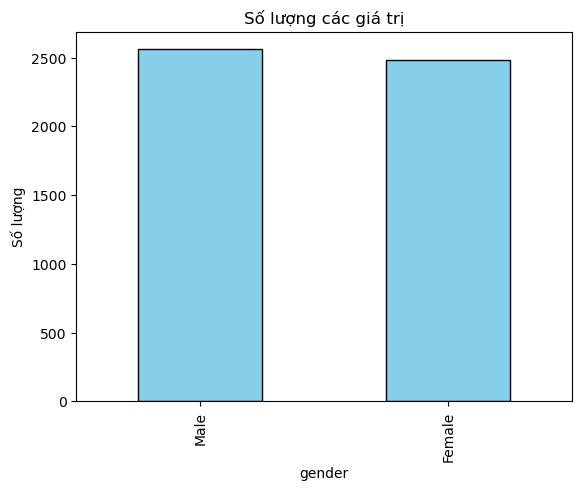

In [6]:
#gender column
gender = df_2['gender'].value_counts()
gender.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Số lượng các giá trị')
plt.ylabel('Số lượng')
print(gender)
plt.show()

Partner
FALSE    1538
TRUE     1462
No       1047
Yes       996
Name: count, dtype: int64


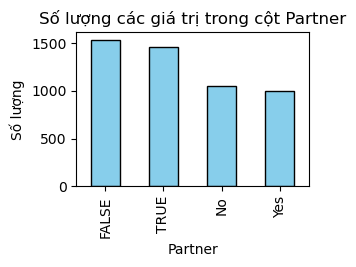

Dependents
FALSE    2070
No       1412
TRUE      930
Yes       631
Name: count, dtype: int64


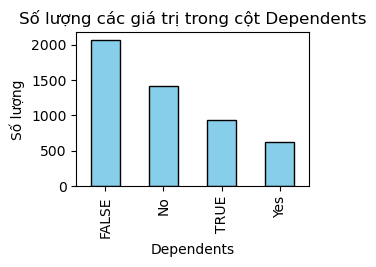

SeniorCitizen
FALSE    2525
0        1699
TRUE      475
1         344
Name: count, dtype: int64


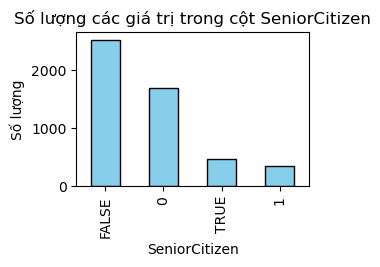

PhoneService
TRUE     2731
Yes      1823
FALSE     269
No        220
Name: count, dtype: int64


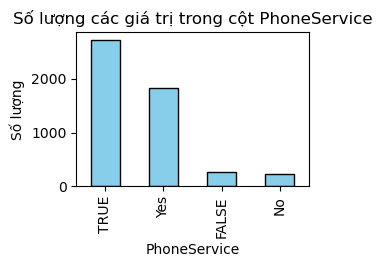

MultipleLines
FALSE               1437
TRUE                1294
No                   987
Yes                  836
No phone service     220
Name: count, dtype: int64


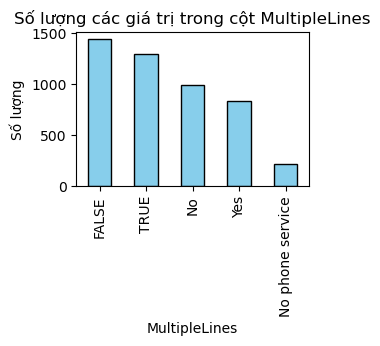

InternetService
Fiber optic    2248
DSL            1715
No             1080
Name: count, dtype: int64


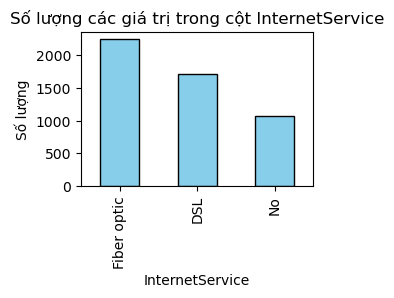

OnlineSecurity
FALSE                  1478
No                     1029
TRUE                    871
Yes                     585
No internet service     429
Name: count, dtype: int64


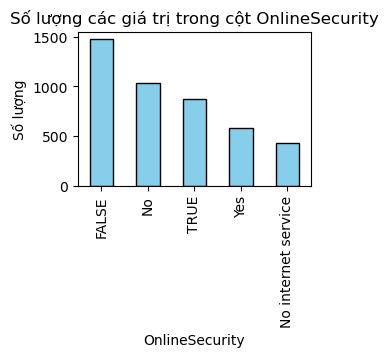

OnlineBackup
FALSE                  1320
TRUE                   1029
No                      911
Yes                     703
No internet service     429
Name: count, dtype: int64


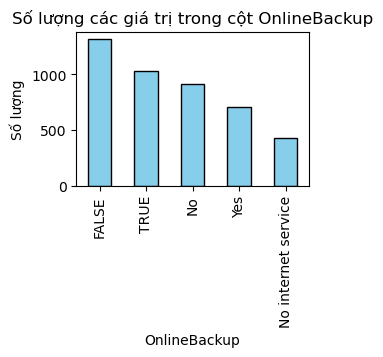

DeviceProtection
FALSE                  1296
TRUE                   1053
No                      923
Yes                     691
No internet service     429
Name: count, dtype: int64


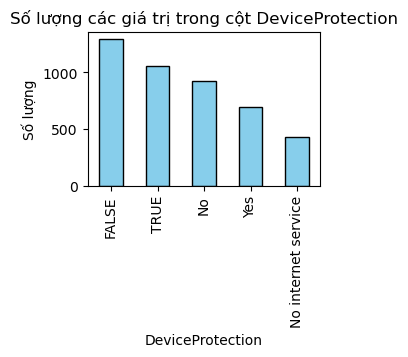

TechSupport
FALSE                  1476
No                      996
TRUE                    873
Yes                     618
No internet service     429
Name: count, dtype: int64


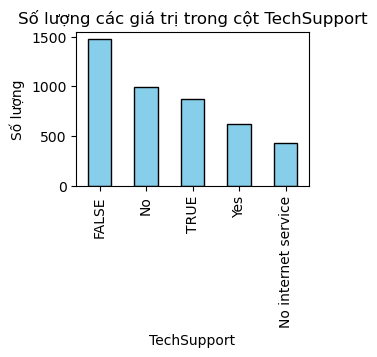

StreamingTV
FALSE                  1190
TRUE                   1159
No                      828
Yes                     786
No internet service     429
Name: count, dtype: int64


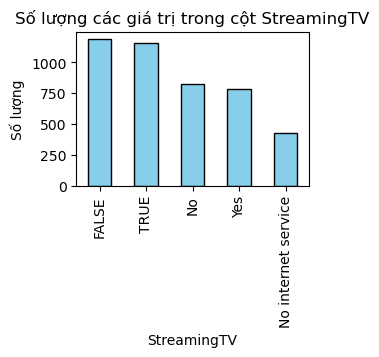

StreamingMovies
TRUE                   1199
FALSE                  1150
No                      831
Yes                     783
No internet service     429
Name: count, dtype: int64


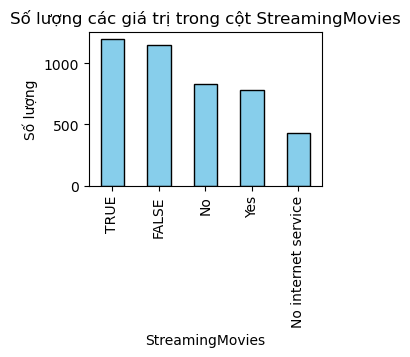

Contract
Month-to-month    2744
Two year          1244
One year          1055
Name: count, dtype: int64


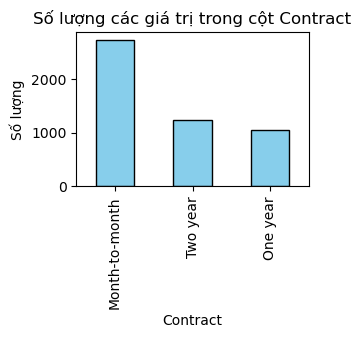

PaperlessBilling
TRUE     1776
FALSE    1224
Yes      1220
No        823
Name: count, dtype: int64


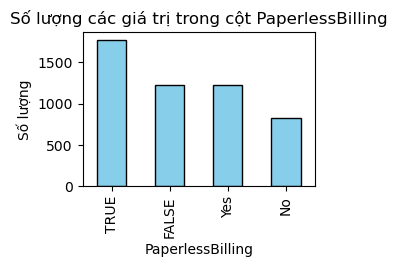

PaymentMethod
Electronic check             1700
Mailed check                 1128
Bank transfer (automatic)    1125
Credit card (automatic)      1090
Name: count, dtype: int64


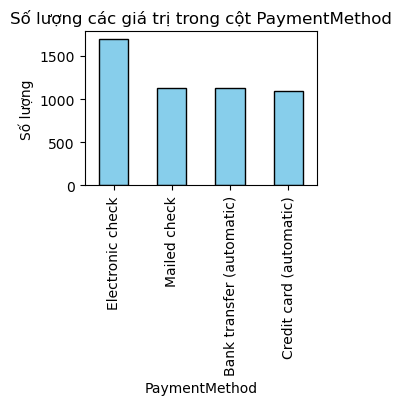

In [7]:


# Tương tự với các thuộc tính còn lại
columns_to_plot = [
    'Partner',
    'Dependents',
    'SeniorCitizen',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]
# Lặp qua từng cột và vẽ biểu đồ
for column in columns_to_plot:
    plt.figure(figsize=(3, 2)) 
    df_2[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Số lượng các giá trị trong cột {column}')
    plt.ylabel('Số lượng')
    plt.xlabel(column)
    print( df_2[column].value_counts())
    plt.show() 


In [8]:
# biểu đồ dữ liệu thì ta cần thay đổi các giá trị dữ liệu sao cho phù hợp ở cột  [Partner], [Dependents], [SeniorCitizen] ,
#[PhoneService], [MultipleLines], [OnlineSecurity], [OnlineBackup], [DeviceProtection], [TechSupport], [StreamingTV]. [StreamingMovies]
#[PaperlessBilling]

In [9]:
#replace partner -- Khách hàng có đối tác hay không
df_2['Partner'] = df_2['Partner'].replace({'TRUE': 'Yes', 'FALSE': 'No'})
#replace Dependents -- khách hàng có người thân hay không
df_2['Dependents'] = df_2['Dependents'].replace({'TRUE': 'Yes', 'FALSE': 'No'})
#replace SeniorCitizen -- Khách hàng có phải là người cao tuổi hay không 
df_2['SeniorCitizen'] = df_2['SeniorCitizen'].replace({'TRUE': '1', 'FALSE': '0'})
#replace PhoneService  -- Khách hàng có sử dụng dịch vụ điện thoại hay không
df_2['PhoneService'] = df_2['PhoneService'].replace({'TRUE': 'Yes', 'FALSE': 'No'})
#replace MultipleLines -- Khách hàng có nhiều sử dụng nhiều đường dây hay không
df_2['MultipleLines'] = df_2['MultipleLines'].replace({'TRUE': 'Yes', 'FALSE': 'No', 'No phone service': 'No'})
#replace OnlineSecurity -- Khách hàng có bảo mật trực tuyến hay không
df_2['OnlineSecurity'] = df_2['OnlineSecurity'].replace({'TRUE': 'Yes', 'FALSE': 'No', 'No internet service': 'No'})
#replace OnlineBackup -- Khách hàng có sao lưu trực tuyến hay không 
df_2['OnlineBackup'] = df_2['OnlineBackup'].replace({'TRUE': 'Yes', 'FALSE': 'No', 'No internet service': 'No'})
#replace DeviceProtection -- Kháhc hàng có bảo vệ các thiết bị hay không
df_2['DeviceProtection'] = df_2['DeviceProtection'].replace({'TRUE': 'Yes', 'FALSE': 'No', 'No internet service': 'No'})
#replace TechSupport -- Khách hàng có hỗ trợ kĩ thuật hay khong 
df_2['TechSupport'] = df_2['TechSupport'].replace({'TRUE': 'Yes', 'FALSE': 'No', 'No internet service': 'No'})
#replace StreamingTV -- Khách hàng có sử dụng dịch vụ phát truyền hình rực tuyến hay không 
df_2['StreamingTV'] = df_2['StreamingTV'].replace({'TRUE': 'Yes', 'FALSE': 'No', 'No internet service': 'No'})
#replace StreamingMovies -- Khách hàng có sử dụng dịch vụ phát phim trực tuyến hay không 
df_2['StreamingMovies'] = df_2['StreamingMovies'].replace({'TRUE': 'Yes', 'FALSE': 'No', 'No internet service': 'No'})
#replace PaperlessBilling -- Kháng thanh toán không cần giấy tờ 
df_2['PaperlessBilling'] = df_2['PaperlessBilling'].replace({'TRUE': 'Yes', 'FALSE': 'No'})

In [10]:
df_2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85000038,FALSE
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,FALSE
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.1500015,TRUE
3,Male,0,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,FALSE
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.6499939,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


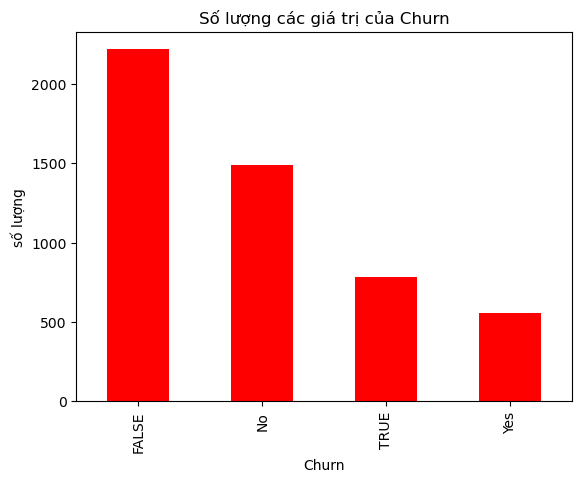

In [11]:
#Xem số lương của các giá trị của biến phụ thuộc
Churn = df_2['Churn'].value_counts()
Churn.plot(kind='bar', color = 'red')
plt.title('Số lượng các giá trị của Churn')
plt.ylabel('số lượng')
plt.show()

In [12]:
df_2.iloc[:,-1] = df_2.iloc[:,-1].replace({"TRUE": "Yes", "FALSE":"No"})


In [13]:
#xem lại toàn bộ bảng 
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   object 
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [14]:
df_2.describe()

,tenure,MonthlyCharges
count,5043.000000,5043.000000
mean,32.576641,65.090214
std,24.529807,30.068133
min,0.000000,18.400000
25%,9.000000,35.775000
50%,29.000000,70.550003
75%,56.000000,90.050003
max,72.000000,118.650002


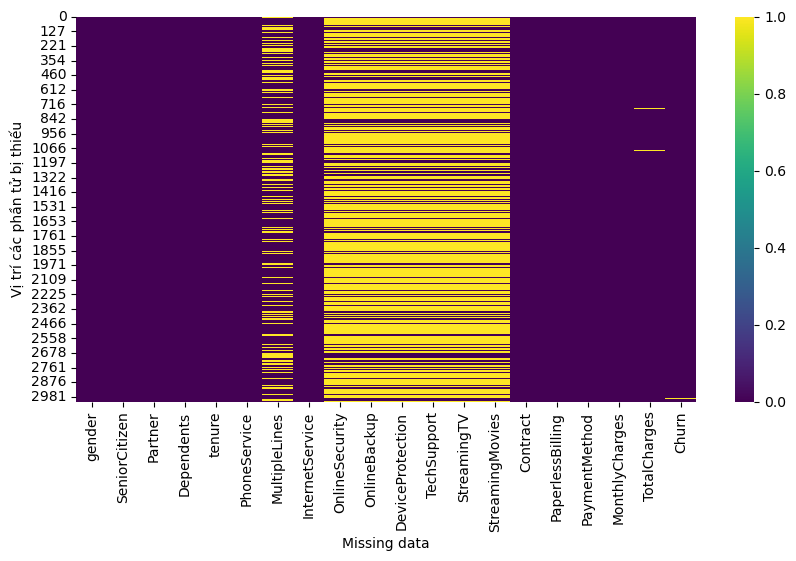

In [15]:
#Handling Missing Data
df_null = df_2[df_2.isna().any(axis=1)]
df_null.isna().sum()
plt.figure(figsize=(10,5))
sns.heatmap(df_null.isna(), cmap='viridis')
plt.xlabel('Missing data')
plt.ylabel('Vị trí các phần tử bị thiếu')
plt.show()

In [16]:
df_null

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85000038,No
3,Male,0,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
7,Female,0,No,No,10,No,NaN,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750000,301.8999939,No
11,Male,0,No,No,16,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,Two year,No,Credit card (automatic),18.950001,326.7999878,No
16,Female,0,No,No,52,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,One year,No,Mailed check,20.650000,1022.950012,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,Male,0,No,No,12,No,NaN,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,34.000000,442.4500122,No
2993,Male,0,Yes,Yes,1,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,One year,No,Mailed check,20.400000,20.39999962,No
2994,Male,0,Yes,No,62,No,NaN,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),38.599998,2345.550049,No
2995,Female,0,No,No,1,No,NaN,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),25.250000,25.25,No


In [17]:
# Danh sách các cột cần thay thế giá trị NaN
columns_to_replace = [
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies'
]
df_2[columns_to_replace] = df_2[columns_to_replace].fillna('No')

In [18]:
df_2.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [19]:
#tỉ lệ yes no của cột multipleLines
df_2['MultipleLines'].isna().sum()
#Xóa bỏ các bản ghi mà có  bị thiếu 
df_2 = df_2.dropna(subset=['MultipleLines'])
churn_null = df_2[df_2['Churn'].isna()]
df_2 = df_2.dropna(subset=['Churn'])
TotalCharges_null = df_2[df_2['TotalCharges'].isna()]
df_3 = df_2.dropna(subset=['TotalCharges'])

In [20]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4770 entries, 1 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4770 non-null   object 
 1   SeniorCitizen     4770 non-null   object 
 2   Partner           4770 non-null   object 
 3   Dependents        4770 non-null   object 
 4   tenure            4770 non-null   int64  
 5   PhoneService      4770 non-null   object 
 6   MultipleLines     4770 non-null   object 
 7   InternetService   4770 non-null   object 
 8   OnlineSecurity    4770 non-null   object 
 9   OnlineBackup      4770 non-null   object 
 10  DeviceProtection  4770 non-null   object 
 11  TechSupport       4770 non-null   object 
 12  StreamingTV       4770 non-null   object 
 13  StreamingMovies   4770 non-null   object 
 14  Contract          4770 non-null   object 
 15  PaperlessBilling  4770 non-null   object 
 16  PaymentMethod     4770 non-null   object 
 17  

Xử lí các dữ liệu ngoai lai (outlier)

In [24]:
df_3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.1500015,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.6499939,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [25]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4770 entries, 1 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4770 non-null   object 
 1   SeniorCitizen     4770 non-null   object 
 2   Partner           4770 non-null   object 
 3   Dependents        4770 non-null   object 
 4   tenure            4770 non-null   int64  
 5   PhoneService      4770 non-null   object 
 6   MultipleLines     4770 non-null   object 
 7   InternetService   4770 non-null   object 
 8   OnlineSecurity    4770 non-null   object 
 9   OnlineBackup      4770 non-null   object 
 10  DeviceProtection  4770 non-null   object 
 11  TechSupport       4770 non-null   object 
 12  StreamingTV       4770 non-null   object 
 13  StreamingMovies   4770 non-null   object 
 14  Contract          4770 non-null   object 
 15  PaperlessBilling  4770 non-null   object 
 16  PaymentMethod     4770 non-null   object 
 17  

In [26]:
#ở đây chỉ có 3 cột tuyến tính là tenure, MonthlyCharges, TotalCharges
#Chúng ta xét xem ở đây có giá trị ngoại lai hay không
df_3['TotalCharges'] =  pd.to_numeric(df_3['TotalCharges'])

ValueError: Unable to parse string " " at position 2945

In [27]:

# Lọc các dòng có giá trị chuỗi trống trong cột 'TotalCharges'
index = df_3[df_3['TotalCharges'].str.strip() == '']

# In ra các dòng có giá trị chuỗi trống
print(index)


      gender SeniorCitizen Partner Dependents  tenure PhoneService  \
3218    Male             0     Yes        Yes       0          Yes   
4670  Female             0     Yes        Yes       0          Yes   
4754    Male             0      No        Yes       0          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
3218            No              No             No           No   
4670           Yes             DSL             No          Yes   
4754           Yes             DSL            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
3218               No          No          No              No  One year   
4670              Yes         Yes         Yes              No  Two year   
4754               No         Yes          No              No  Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
3218              Yes               Mailed check           19.70        

In [28]:
index = [4754,4670,3218]
df_3 = df_3.drop(index, axis = 0)

In [29]:
df_3['TotalCharges'] =  pd.to_numeric(df_3['TotalCharges'])
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4767 entries, 1 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4767 non-null   object 
 1   SeniorCitizen     4767 non-null   object 
 2   Partner           4767 non-null   object 
 3   Dependents        4767 non-null   object 
 4   tenure            4767 non-null   int64  
 5   PhoneService      4767 non-null   object 
 6   MultipleLines     4767 non-null   object 
 7   InternetService   4767 non-null   object 
 8   OnlineSecurity    4767 non-null   object 
 9   OnlineBackup      4767 non-null   object 
 10  DeviceProtection  4767 non-null   object 
 11  TechSupport       4767 non-null   object 
 12  StreamingTV       4767 non-null   object 
 13  StreamingMovies   4767 non-null   object 
 14  Contract          4767 non-null   object 
 15  PaperlessBilling  4767 non-null   object 
 16  PaymentMethod     4767 non-null   object 
 17  

<class 'pandas.core.frame.DataFrame'>
Index: 4767 entries, 1 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4767 non-null   object 
 1   SeniorCitizen     4767 non-null   object 
 2   Partner           4767 non-null   object 
 3   Dependents        4767 non-null   object 
 4   tenure            4767 non-null   int64  
 5   PhoneService      4767 non-null   object 
 6   MultipleLines     4767 non-null   object 
 7   InternetService   4767 non-null   object 
 8   OnlineSecurity    4767 non-null   object 
 9   OnlineBackup      4767 non-null   object 
 10  DeviceProtection  4767 non-null   object 
 11  TechSupport       4767 non-null   object 
 12  StreamingTV       4767 non-null   object 
 13  StreamingMovies   4767 non-null   object 
 14  Contract          4767 non-null   object 
 15  PaperlessBilling  4767 non-null   object 
 16  PaymentMethod     4767 non-null   object 
 17  

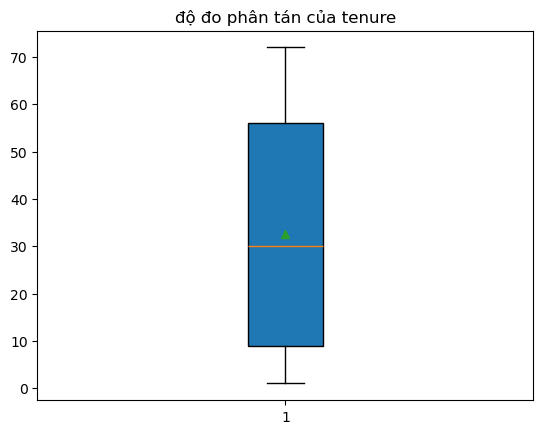

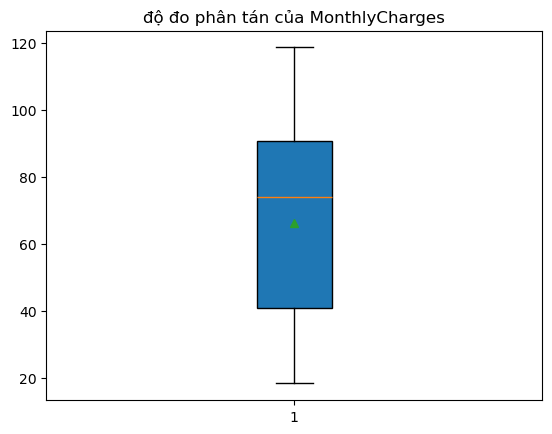

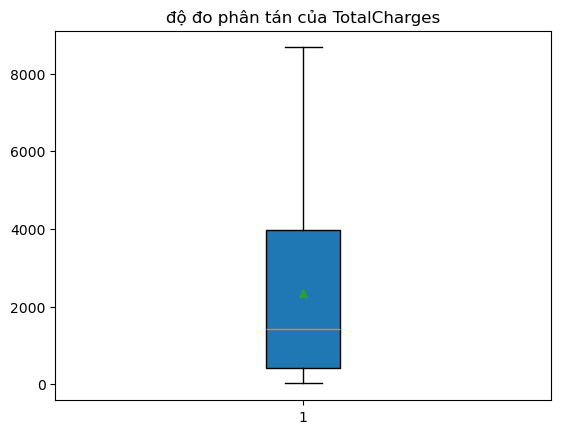

In [30]:
#xem độ đo phân tán các giá trị của ác thuộc tính tuyến tính
#Chuyển các dữ liệu tuyến tính về dạng số
df_3['TotalCharges'] =  pd.to_numeric(df_3['TotalCharges'])
df_3.info()

plt.boxplot(df_3.iloc[:,4], patch_artist=True, showmeans = True)
plt.title('độ đo phân tán của tenure')
plt.show()
          
plt.boxplot(df_3['MonthlyCharges'], patch_artist=True, showmeans = True)
plt.title('độ đo phân tán của MonthlyCharges')
plt.show()

plt.boxplot(df_3['TotalCharges'], patch_artist=True, showmeans = True)
plt.title('độ đo phân tán của TotalCharges')
plt.show()

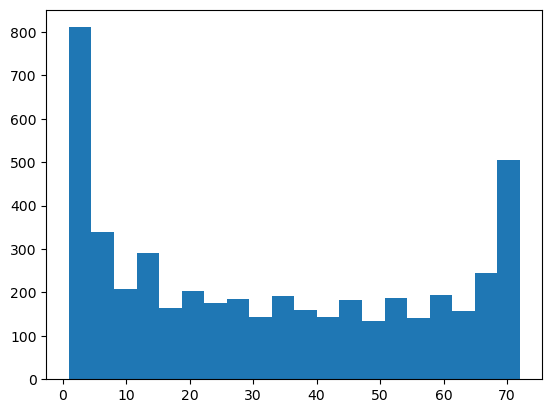

In [31]:
plt.hist(df_3['tenure'], bins=20)
plt.show()

==> Dữ liệu không có giá trị ngoại lai

Biến đổi và chuẩn hóa dữ liệu


Biến đổi dữ liệu thành dang nhị phân với các kiểu object
--> sử dụng OneHotEncode

In [32]:
#thuộc tính chưa giá trị tuyến tính
number = ['tenure', 'MonthlyCharges', 'TotalCharges']# chuẩn hóa dữ liệu bằng z-score
index_1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
          'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn', 'PaperlessBilling']# thuộc tính có hai giá trị yes or no sử dụng LabelEnCoding
index_2 = ['InternetService', 'Contract', 'PaymentMethod']# thuộc tính có hơn hai giá trị sử dụng OneHotEncoding

In [33]:
df_4=df_3
df_4 = df_4.reset_index(drop=True)
df_4


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
1,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
2,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
3,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.500000,Yes
4,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
4763,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
4764,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
4765,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [34]:
#Biến đổi các thuộc tính có hai giá trị thành 0 và 1
LE = LabelEncoder()
for col in index_1 :
 df_4[col] = LE.fit_transform(df_3[col])
df_4

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.950001,1889.500000,0
1,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.849998,108.150002,1
2,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.699997,151.649994,1
3,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.650002,820.500000,1
4,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.099998,1949.400024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.800000,1990.500000,0
4763,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.200000,7362.900000,0
4764,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.600000,346.450000,0
4765,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.400000,306.600000,1


In [35]:

onehot_encoder = OneHotEncoder(sparse_output=False)  
# Fit và transform dữ liệu
encoded_data = onehot_encoder.fit_transform(df_4[index_2])
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(index_2))


In [36]:
df_combined = pd.concat([encoded_df, df_4], axis=1)
df_combined = df_combined.drop(columns=index_2)
df_combined

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,0,1,0,0,0,0,56.950001,1889.500000,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,1,0,0,0,0,1,53.849998,108.150002,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,70.699997,151.649994,1
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,1,1,1,99.650002,820.500000,1
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,1,0,1,89.099998,1949.400024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,0,1,1,1,1,1,84.800000,1990.500000,0
4763,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,0,1,1,1,103.200000,7362.900000,0
4764,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,1,29.600000,346.450000,0
4765,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,74.400000,306.600000,1


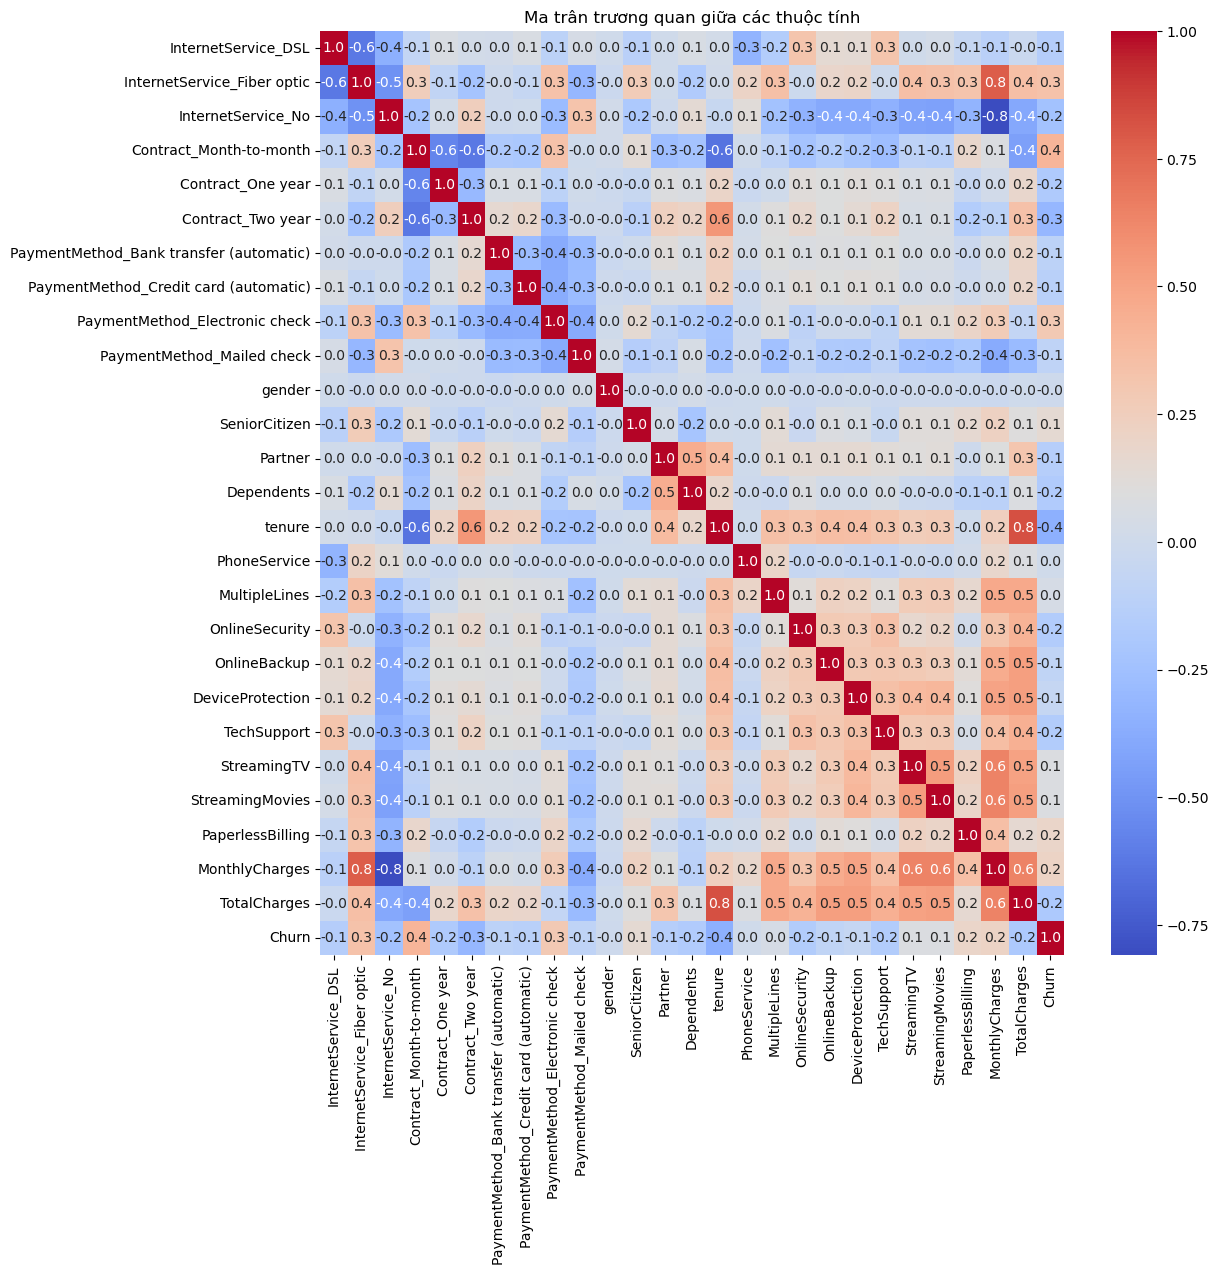

In [37]:
#Thuộc tính có tính tương quan cao qua ma trận tương quan
corr_matrix = df_combined.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True, fmt ='.1f', cmap='coolwarm', cbar = True)
plt.title("Ma trân trương quan giữa các thuộc tính")
plt.savefig("corr_matrix.png", format="png") 

In [38]:
plt.savefig("corr_matrix_1.png", format="png") 

<Figure size 640x480 with 0 Axes>

Tệp dữ liệu chưa xử lí mất cân bằng dữ liệu

 Chia dữ liệu thành tập huấn luyện và tập kiểm tra:

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_combined.drop('Churn', axis=1), 
                                                    df_combined['Churn'], 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify= df_combined['Churn'])


In [40]:
# chuẩn hóa dữ liệu bằng z-score
scaler = StandardScaler()
X_train[number] = scaler.fit_transform(X_train[number])
X_train


,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
2141,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,0,1.607945,2.400131
1560,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,-1.562182,-0.597007
36,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,1,1,0,0,1,0,1,0.090931,1.104976
2908,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,1,1,1,1,1,1,1,0.807944,1.769837
4262,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,-1.396207,-1.008260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,1,0,1,1,1,1.282633,1.324693
1025,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,0,0,0,1,0,1,-0.058447,-0.608711
1575,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0.104209,-0.988557
2465,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-1.572140,-0.520310


In [41]:
X_test[number] = scaler.fit_transform(X_test[number])
X_test

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
2158,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-1.493974,-0.480653
2848,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,1,0,0,1,0,0.154827,-0.178713
4415,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,1,1,1,0,0,0.913567,0.466082
3483,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,-1.310774,-0.708735
4440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,1,0,1,0.748200,-0.598551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4650,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,1,0.250480,0.738376
4093,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,1,1,0,1,0,-0.574731,0.458261
1457,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,0,0,0,0,1,1,-0.047828,-0.596719
4058,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,1,1,0,1,1,1,1.268618,2.065714


In [42]:
X_train.shape

(3813, 26)

Sử dụng mô hình Logistic Regresstion để dự doán Khách hàng có rời bỏ hay không

In [43]:
model_LogisticRegression = LogisticRegression(
    tol=1e-4,              # Sai số cho điều kiện hội tụ
    solver='lbfgs',        # Thuật toán tối ưu: 'lbfgs'
    max_iter=100,          # Số lần lặp tối đa cho thuật toán tối ưu
)

In [44]:
model_LogisticRegression.fit(X_train,y_train)

LogisticRegression()

Thông số của mô hình sau khi huấn luyện 


In [45]:
print('hệ số coef:', model_LogisticRegression.coef_)

hệ số coef: [[-0.14742185  0.73439056 -0.88351244  0.6518949  -0.02661861 -0.92182003
  -0.06904887 -0.23839668  0.1149219  -0.10402008 -0.02863924  0.21823882
   0.04752196 -0.1257839  -1.65200045 -0.92377622  0.22794939 -0.45774825
  -0.23738818 -0.0282045  -0.40134719  0.23152251  0.1305374   0.26312168
   0.04735668  0.93007684]]


In [46]:
print('hệ số chặn intercept:', model_LogisticRegression.intercept_)

hệ số chặn intercept: [-1.1920947]


Đánh giá mô hình : 

In [47]:
y_pred = model_LogisticRegression.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Tạo DataFrame rỗng với các cột đánh giá
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Tạo DataFrame tạm thời với các kết quả
new_row = pd.DataFrame([{
    'Model': model_LogisticRegression,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
}])

# Dùng pd.concat để thêm hàng mới vào DataFrame
results_df = pd.concat([results_df, new_row], ignore_index=True)

print(results_df)

                  Model  Accuracy  Precision    Recall  F1 Score
0  LogisticRegression()  0.790356   0.628571  0.519685  0.568966


C:\Users\LT\AppData\Local\Temp\ipykernel_22680\2391141211.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Xử lí mất cân bằng xử lí liệu 


In [46]:
# chia thành biến đọc lập và biến phụ thuộc
X = df_combined.drop('Churn', axis=1)
y = df_combined['Churn']
print(X.shape)
print(y.shape)
y.value_counts()

(4767, 26)
(4767,)


Churn
0    3496
1    1271
Name: count, dtype: int64

In [47]:
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled= smote.fit_resample(X, y)
y_resampled.value_counts()
print(X_resampled.shape)

(6992, 26)


In [48]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify= y_resampled)

In [49]:
scaler = StandardScaler()
X_train_2[number] = scaler.fit_transform(X_train_2[number])
X_train_2
X_test_2[number] = scaler.fit_transform(X_test_2[number])
X_test_2

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
5703,0.0,1.0,0.0,1.000000,0.000000,0.0,0.000000,0.994974,0.005026,0.0,...,1,0,0,0,0,0,1,1,0.751126,-0.843541
3750,0.0,1.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,...,1,0,1,0,0,0,1,1,0.748855,-0.843540
3542,1.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,...,0,0,0,0,0,0,0,0,-0.893951,-0.897911
2088,1.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,...,0,1,0,1,0,0,0,0,-0.498136,-0.882154
477,0.0,1.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,...,0,0,0,0,0,1,0,1,0.344283,-0.874513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.0,0.0,1.0,0.013353,0.986647,0.0,0.986647,0.013353,0.000000,0.0,...,0,0,0,0,0,0,0,0,-1.762501,-0.849626
2583,0.0,0.0,1.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.0,...,0,0,0,0,0,0,0,0,-1.746879,-0.566848
439,0.0,1.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,...,0,1,0,0,0,0,0,1,0.149879,-0.890360
3966,0.0,1.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,...,1,0,0,0,0,1,1,1,0.811905,-0.911204


In [50]:
model_LogisticRegression_2 = LogisticRegression(
      tol=1e-4,              
    solver='lbfgs',   
)
model_LogisticRegression_2.fit(X_train_2, y_train_2)

LogisticRegression()

In [51]:
print('hệ số coef:', model_LogisticRegression.coef_)
print('hệ số chặn intercept:', model_LogisticRegression.intercept_)

hệ số coef: [[-0.14742185  0.73439056 -0.88351244  0.6518949  -0.02661861 -0.92182003
  -0.06904887 -0.23839668  0.1149219  -0.10402008 -0.02863924  0.21823882
   0.04752196 -0.1257839  -1.65200045 -0.92377622  0.22794939 -0.45774825
  -0.23738818 -0.0282045  -0.40134719  0.23152251  0.1305374   0.26312168
   0.04735668  0.93007684]]
hệ số chặn intercept: [-1.1920947]


In [52]:
# Đánh giá kết quả 
y_pred_2 = model_LogisticRegression_2.predict(X_test_2)


accuracy = accuracy_score(y_test_2, y_pred_2)
precision = precision_score(y_test_2, y_pred_2)
recall = recall_score(y_test_2, y_pred_2)
f1 = f1_score(y_test_2, y_pred_2)

print(f'accuracy: {accuracy:.2f} precision: {precision:.2f} recall: {recall:.2f} f1: {f1:.2f}')



accuracy: 0.84 precision: 0.83 recall: 0.85 f1: 0.84


Chạy mô hình dự đoán bằng code thủ công bằng gradient descent

In [53]:
class Logistic_Regression:
    #Khai báo các chỉ số
    def __init__(self, learning_rate, iter):
        self.learning_rate = learning_rate
        self.iter = iter
        self.w = None
        self.b = None
    # Hàm kích hoạt sigmoid
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    #Hàm loss function
    def loss_function(self, y, y_pred):
        return -np.mean(y*np.log(y_pred) - (1-y)*np.log(1-y_pred))
    
    def Logistic_Regression(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros((n_features, 1))
        self.b = 0  
        y = y.reshape((-1, 1))
        #forward propagation
        for i in range(self.iter):
            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)
            
            #gradient descent
            w_gradient = np.dot(X.T, (y_pred - y))/n_samples
            b_gradient = np.sum(y_pred - y)/n_samples
            #cập nhật các trọng số
            self.w = self.w - self.learning_rate*w_gradient
            self.b = self.b - self.learning_rate*b_gradient
            #in ra tỉ lệ hàm mất mát 
            if i % 10 == 0:
                loss_function = self.loss_function(y, y_pred)
                print(f"Iteration {i}, Loss: {loss_function:.10f}")
    #Khớp với mô hình
    def fit(self, X, y):
        self.Logistic_Regression(X, y)
    #Dự đoán
    def predict(self, X):
        z = z = np.dot(X, self.w) + self.b
        y_pred = self.sigmoid(z)
        #tạo mảng chứa giá trị dự đoán
        y_pred_array = []
        for i in y_pred:
            if i >= 0.5: 
                y_pred_array.append(1)
            else:
                y_pred_array.append(0)
        return np.array(y_pred_array)
        
    #các thông số đánh giá
    
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)
        
    def precision(self, X, y):
        y_pred = self.predict(X)
        return precision_score(y, y_pred)
        
    def recall(self, X, y):
        y_pred = self.predict(X)
        return recall_score(y, y_pred)
        
    def f1(self, X, y):
        y_pred = self.predict(X)
        return f1_score(y, y_pred)

In [54]:
if __name__ == "__main__":
    from sklearn.datasets import make_classification

In [55]:
model_LogisticRegression_3 = Logistic_Regression(learning_rate=0.0001, iter=150)
X_train_3= X_train_2.to_numpy()  
y_train_3= y_train_2.to_numpy()  
model_LogisticRegression_3.fit(X_train_3, y_train_3)

Iteration 0, Loss: 0.0001239312
Iteration 10, Loss: 0.0001187711
Iteration 20, Loss: 0.0001136097
Iteration 30, Loss: 0.0001084468
Iteration 40, Loss: 0.0001032825
Iteration 50, Loss: 0.0000981168
Iteration 60, Loss: 0.0000929498
Iteration 70, Loss: 0.0000877814
Iteration 80, Loss: 0.0000826116
Iteration 90, Loss: 0.0000774405
Iteration 100, Loss: 0.0000722680
Iteration 110, Loss: 0.0000670942
Iteration 120, Loss: 0.0000619190
Iteration 130, Loss: 0.0000567426
Iteration 140, Loss: 0.0000515648


In [56]:
X_test_3= X_test_2.to_numpy()  
y_test_3= y_test_2.to_numpy()

In [57]:
y_pred_3 = model_LogisticRegression_3.predict(X_test_3)

In [58]:
accuracy_1 = accuracy_score(y_test_3, y_pred_3)
precision_1 = precision_score(y_test_3, y_pred_3)
recall_1 = recall_score(y_test_3, y_pred_3)
f1_1 = f1_score(y_test_3, y_pred_3)


print(f'accuracy: {accuracy_1:.2f} precision: {precision_1:.2f} recall: {recall_1:.2f} f1: {f1_1:.2f}')

accuracy: 0.78 precision: 0.75 recall: 0.83 f1: 0.79
